# Time-series analysis for sales and demand forecasting

# A. Import packages and data

###1. Load the appropriate libraries and models

To run the steps below which load the appropriate and compatible libraries and models, the Topic Project Template was used (Olamaie, 2025).

In [ ]:
# Install specific versions of the libraries to ensure compatibility for time series analysis and machine learning
!pip install --upgrade --force-reinstall \
    numpy==1.26.4 \
    pandas==2.1.3 \
    matplotlib==3.8.4 \
    seaborn==0.13.2 \
    statsmodels==0.14.1 \
    scipy==1.12.0 \
    pmdarima==2.0.3 \
    scikit-learn==1.3.2 \
    tensorflow==2.15.0 \
    openpyxl==3.1.2 \
    xlrd==2.0.1 \
    sktime==0.25.0 \
    dask[complete]==2024.5.2 # to prevent a dask-related error with XGBoost model

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 111.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 128.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13

In [ ]:
# Import relevant libraries for time series analysis and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
import tensorflow as tf
import sktime
from sktime.forecasting.arima import AutoARIMA

/usr/local/lib/python3.11/dist-packages/pmdarima/compat/sklearn.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


In [ ]:
# Import google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import datetime functions
from datetime import datetime, timedelta

# Import visualisation tools
from matplotlib.patches import Rectangle
import matplotlib.animation as animation
from matplotlib import animation
from matplotlib import rc

# Import statsmodels visuals and diagnostic tools
import statsmodels.graphics.api as smgraphics # gives access to all plotting functions in statsmodels.
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller as adf
from statsmodels.tsa.seasonal import STL

# Import boxcox transformation
from scipy.stats import boxcox

# Import pandas integration with matplotlib for datetime type handling
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import timeseries forecasting models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from pmdarima.arima import auto_arima

# Import gdown to download google drive files
import gdown

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the autocorrelation fuction for timeseries analysis
from statsmodels.tsa.stattools import acf

# Import MSE
from sklearn.metrics import mean_squared_error

# Import functions for pipeline to prepare machine learning models to be used for timeseries forecasting
import lightgbm as lgb
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Import functions to deal with trends and seasonality
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

# Import xgboost regressor
from xgboost import XGBRegressor

# Import functions for hyperparameter tuning of models
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# Import Keras functions and hyperparameter tuning
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
!pip install keras-tuner --upgrade # Install keras tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Import scaler
from sklearn.preprocessing import MinMaxScaler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


All libraries and models were successfully loaded and installed, and Google Drive was mounted to import the datasets.

###2. Import the data set with the provided URL

In [ ]:
file_path = '/content/drive/My Drive/ISBN List.xlsx'

In [ ]:
# Read all four tabs
xls = pd.read_excel(file_path, sheet_name=None)

# Show all sheet names
print(xls.keys())

dict_keys(['F - Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


In [ ]:
# Show dataframe for first sheet
isbn_fiction_data = xls['F - Adult Fiction']
print(isbn_fiction_data.shape)
isbn_fiction_data.head()

(125, 10)


,ISBN,Title,Author,Imprint,Publisher Group,RRP,Binding,Publication Date,Product Class,Country of Publication
0,9780330375252,Bridget Jones's Diary (Film Tie-in),"Fielding, Helen",Picador,Pan Macmillan Grp,8.99,Paperback,2001-03-23,F1.1 General & Literary Fiction,United Kingdom
1,9780140276336,White Teeth,"Smith, Zadie",Penguin Books Ltd,Penguin Grp,9.99,Paperback,2001-01-25,F1.1 General & Literary Fiction,United Kingdom
2,9780006512134,Man and Boy,"Parsons, Tony",HarperCollins Publishers,HarperCollins Grp,8.99,Paperback,2000-03-06,F1.1 General & Literary Fiction,United Kingdom
3,9780099280255,"Brethren,The","Grisham, John",Arrow Books,Random House Grp,6.99,Paperback,2000-12-27,"F2.1 Crime, Thriller & Adventure",United Kingdom
4,9780552998727,Marrying The Mistress:an irresistible and grip...,"Trollope, Joanna",Black Swan,Transworld Grp,10.99,Paperback,2001-02-01,F1.1 General & Literary Fiction,United Kingdom


The first dataframe contains 125 rows representing the ISBNs and 10 columns.

In [ ]:
# Show dataframe for the second sheet
isbn_specialist_data = xls['S Adult Non-Fiction Specialist']
print(isbn_specialist_data.shape)
isbn_specialist_data.head()

(125, 10)


,ISBN,Title,Author,Imprint,Publisher Group,RRP,Binding,Publication Date,Product Class,Country of Publication
0,9781858285511,"Rough Guide to the Internet,The:Rough Guides R...","Kennedy, Angus J.",Rough Guides,Rough Guides Grp,6.00,Paperback,2000-10-26,S10.1 Computing: Consumer Books ('Technical Tr...,United Kingdom
1,9780099286387,Geisha,"Dalby, Liza",Vintage,Random House Grp,12.99,Paperback,2000-09-28,S3.4 Gender Studies / Gay & Lesbian Studies,United Kingdom
2,9780521436809,English Grammar in Use With Answers:Reference ...,"Murphy, Raymond",Cambridge University Press,Cambridge U.P. Grp,13.00,Paperback,1994-01-28,S1.1T ELT Course Materials,United Kingdom
3,9780713996029,Fast Food Nation:What The All-American Meal is...,"Schlosser, Eric",Allen Lane,Penguin Grp,9.99,Paperback,2001-04-26,S4.6 Industrial Studies: General,United Kingdom
4,9781858287393,"Rough Guide to the Internet,The:Mini Rough Guides","Kennedy, Angus J.",Rough Guides,Rough Guides Grp,6.00,Paperback,2001-10-25,S10.1 Computing: Consumer Books ('Technical Tr...,United Kingdom


In [ ]:
# Show dataframe for the third sheet
isbn_trade_data = xls['T Adult Non-Fiction Trade']
print(isbn_trade_data.shape)
isbn_trade_data.head()

(125, 10)


,ISBN,Title,Author,Imprint,Publisher Group,RRP,Binding,Publication Date,Product Class,Country of Publication
0,9780752837505,"Child Called It,A","Pelzer, Dave",Orion (an Imprint of The Orion Publishing Grou...,Orion Grp,6.99,Paperback,2009-04-16,T4.0A Autobiography: General,United Kingdom
1,9780718144845,Happy Days with the Naked Chef,"Oliver, Jamie",Michael Joseph,Penguin Grp,20.00,Hardback,2001-09-03,T16.0 Food & Drink: General,United Kingdom
2,9780007110919,Billy Connolly,"Stephenson, Pamela",HarperCollins Entertainment,HarperCollins Grp,17.99,Hardback,2001-10-01,T4.1 Biography: The Arts,United Kingdom
3,9780340766057,McCarthy's Bar:A Journey of Discovery in Ireland,"McCarthy, Pete",Sceptre,Hodder & Stoughton Grp,10.99,Paperback,2001-03-15,T8.5 Travel Writing,United Kingdom
4,9780851121246,Guinness World Records:2002,NaN,Guinness World Records,Guinness Publisher Group,18.00,Hardback,2001-09-28,T2.0 Encyclopedias & General Reference,United Kingdom


In [ ]:
# Show dataframe for the fourth sheet
isbn_children_data = xls["Y Children's, YA & Educational"]
print(isbn_children_data.shape)
isbn_children_data.head()

(125, 10)


,ISBN,Title,Author,Imprint,Publisher Group,RRP,Binding,Publication Date,Product Class,Country of Publication
0,9780747550990,Harry Potter and the Goblet of Fire,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,8.99,Paperback,2001-07-06,Y2.1 Children's Fiction,United Kingdom
1,9780747538486,Harry Potter and the Chamber of Secrets,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,6.99,Paperback,1999-05-28,Y2.1 Children's Fiction,United Kingdom
2,9780747532743,Harry Potter and the Philosopher's Stone,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,6.99,Paperback,1997-06-26,Y2.1 Children's Fiction,United Kingdom
3,9780747546290,Harry Potter and the Prisoner of Azkaban,"Rowling, J. K.",Bloomsbury Publishing PLC,Bloomsbury Grp,6.99,Paperback,2000-04-01,Y2.1 Children's Fiction,United Kingdom
4,9780747554660,Comic Relief: Fantastic Beasts and Where to Fi...,"Scamander, Newt & Rowling, J. K.",Obscurus Books,Bloomsbury Grp,2.50,Paperback,2001-03-12,Y2.2 Young Adult Fiction,United Kingdom


All four tabs from the ISBN file are loaded. Each contain 125 rows with different book titles and 10 columns.

In [ ]:
# Add 'Category' column to each dataframe
isbn_fiction_data['Category'] = 'Fiction'
isbn_specialist_data['Category'] = 'Specialist'
isbn_trade_data['Category'] = 'Trade'
isbn_children_data['Category'] = 'Children'

# Concatenate the four dataframes into one
isbn_data = pd.concat([isbn_fiction_data, isbn_specialist_data, isbn_trade_data, isbn_children_data], axis=0, ignore_index=True)
print(isbn_data.shape)
isbn_data.head()

(500, 11)


,ISBN,Title,Author,Imprint,Publisher Group,RRP,Binding,Publication Date,Product Class,Country of Publication,Category
0,9780330375252,Bridget Jones's Diary (Film Tie-in),"Fielding, Helen",Picador,Pan Macmillan Grp,8.99,Paperback,2001-03-23,F1.1 General & Literary Fiction,United Kingdom,Fiction
1,9780140276336,White Teeth,"Smith, Zadie",Penguin Books Ltd,Penguin Grp,9.99,Paperback,2001-01-25,F1.1 General & Literary Fiction,United Kingdom,Fiction
2,9780006512134,Man and Boy,"Parsons, Tony",HarperCollins Publishers,HarperCollins Grp,8.99,Paperback,2000-03-06,F1.1 General & Literary Fiction,United Kingdom,Fiction
3,9780099280255,"Brethren,The","Grisham, John",Arrow Books,Random House Grp,6.99,Paperback,2000-12-27,"F2.1 Crime, Thriller & Adventure",United Kingdom,Fiction
4,9780552998727,Marrying The Mistress:an irresistible and grip...,"Trollope, Joanna",Black Swan,Transworld Grp,10.99,Paperback,2001-02-01,F1.1 General & Literary Fiction,United Kingdom,Fiction


The four dataframes are now concatenated into one with 500 rows and 11 columns, including a 'Category' column.

In [ ]:
file_path = '/content/drive/My Drive/UK Weekly Trended Timeline.xlsx'

In [ ]:
# Read all four tabs
xls = pd.read_excel(file_path, sheet_name=None)

# Show all sheet names
print(xls.keys())

dict_keys(['F Adult Fiction', 'S Adult Non-Fiction Specialist', 'T Adult Non-Fiction Trade', "Y Children's, YA & Educational"])


In [ ]:
# Show first dataframe
weekly_fiction_data = xls['F Adult Fiction']
print(weekly_fiction_data.shape)
weekly_fiction_data.head()

(73767, 13)


,ISBN,Title,Author,Interval,End Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher Group,Product Class
0,9780002261821,One For My Baby,"Parsons, Tony",200513,2005-04-02,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction
1,9780002261821,One For My Baby,"Parsons, Tony",200503,2005-01-22,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction
2,9780002261821,One For My Baby,"Parsons, Tony",200422,2004-05-29,1,11.19,11.19,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction
3,9780002261821,One For My Baby,"Parsons, Tony",200415,2004-04-10,2,27.18,13.59,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction
4,9780002261821,One For My Baby,"Parsons, Tony",200404,2004-01-24,2,22.48,11.24,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction


In [ ]:
# Show second dataframe
weekly_specialist_data = xls['S Adult Non-Fiction Specialist']
print(weekly_specialist_data.shape)
weekly_specialist_data.head()

(32827, 13)


,ISBN,Title,Author,Interval,End Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher Group,Product Class
0,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200917,2009-04-25,1,4.96,4.96,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides
1,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200840,2008-10-04,1,0.99,0.99,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides
2,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200838,2008-09-20,1,0.99,0.99,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides
3,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200623,2006-06-10,1,2.00,2.00,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides
4,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200603,2006-01-21,-1,-12.99,12.99,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides


In [ ]:
# Show third dataframe
weekly_trade_data = xls['T Adult Non-Fiction Trade']
print(weekly_trade_data.shape)
weekly_trade_data.head()

(65344, 13)


,ISBN,Title,Author,Interval,End Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher Group,Product Class
0,9780002572040,"Dog Listener, The","Fennell, Jan",200919,2009-05-09,1,2.38,2.3800,14.99,Hardback,HarperCollins Publishers,HarperCollins Grp,T11.4 Pets & Equine
1,9780002572040,"Dog Listener, The","Fennell, Jan",200918,2009-05-02,3,8.42,2.8067,14.99,Hardback,HarperCollins Publishers,HarperCollins Grp,T11.4 Pets & Equine
2,9780002572040,"Dog Listener, The","Fennell, Jan",200917,2009-04-25,6,7.66,1.2767,14.99,Hardback,HarperCollins Publishers,HarperCollins Grp,T11.4 Pets & Equine
3,9780002572040,"Dog Listener, The","Fennell, Jan",200916,2009-04-18,3,3.28,1.0933,14.99,Hardback,HarperCollins Publishers,HarperCollins Grp,T11.4 Pets & Equine
4,9780002572040,"Dog Listener, The","Fennell, Jan",200914,2009-04-04,2,2.48,1.2400,14.99,Hardback,HarperCollins Publishers,HarperCollins Grp,T11.4 Pets & Equine


In [ ]:
# Show fourth dataframe
weekly_children_data = xls["Y Children's, YA & Educational"]
print(weekly_children_data.shape)
weekly_children_data.head()

(55286, 13)


,ISBN,Title,Author,Interval,End Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher Group,Product Class
0,9780001713031,"Cat in the Hat, The","Seuss, Dr.",201433,2014-08-16,5,24.95,4.99,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning
1,9780001713031,"Cat in the Hat, The","Seuss, Dr.",200742,2007-10-20,1,3.99,3.99,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning
2,9780001713031,"Cat in the Hat, The","Seuss, Dr.",200741,2007-10-13,3,14.97,4.99,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning
3,9780001713031,"Cat in the Hat, The","Seuss, Dr.",200738,2007-09-22,4,18.96,4.74,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning
4,9780001713031,"Cat in the Hat, The","Seuss, Dr.",200737,2007-09-15,2,7.98,3.99,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning


The data from the UK Weekly Trended file were loaded into four dataframes. They all contain 13 columns and respectively 73767, 32827, 65344, 55286 rows.

In [ ]:
# Add column 'Category' to each dataframe
weekly_fiction_data['Category'] = 'Fiction'
weekly_specialist_data['Category'] = 'Specialist'
weekly_trade_data['Category'] = 'Trade'
weekly_children_data['Category'] = 'Children'

# Concatenate the four dataframes into one
weekly_data = pd.concat([weekly_fiction_data, weekly_specialist_data, weekly_trade_data, weekly_children_data], axis=0, ignore_index=True)
print(weekly_data.shape)
weekly_data.head()

(227224, 14)


,ISBN,Title,Author,Interval,End Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher Group,Product Class,Category
0,9780002261821,One For My Baby,"Parsons, Tony",200513,2005-04-02,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
1,9780002261821,One For My Baby,"Parsons, Tony",200503,2005-01-22,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
2,9780002261821,One For My Baby,"Parsons, Tony",200422,2004-05-29,1,11.19,11.19,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
3,9780002261821,One For My Baby,"Parsons, Tony",200415,2004-04-10,2,27.18,13.59,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
4,9780002261821,One For My Baby,"Parsons, Tony",200404,2004-01-24,2,22.48,11.24,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction


The four sheets are now combined into one dataframe with 227224 rows and 14 columns, including a Category column.

#B. Conducting initial data investigation

### 1. Note that the data provided is weekly data. If no sales happened in a particular week, there will be no data representation for that week. This means that the data is not at fixed intervals. As a result, resample the data and fill in missing values with 0, such that even weeks with 0 sales is represented.


In [ ]:
# replace colunn name spaces with underscores
weekly_data.columns = weekly_data.columns.str.replace(' ', '_')
isbn_data.columns = isbn_data.columns.str.replace(' ', '_')

# Convert ISBN to string type
weekly_data['ISBN'] = weekly_data['ISBN'].astype(str)
isbn_data['ISBN'] = isbn_data['ISBN'].astype(str)

In [ ]:
weekly_data.head()

,ISBN,Title,Author,Interval,End_Date,Volume,Value,ASP,RRP,Binding,Imprint,Publisher_Group,Product_Class,Category
0,9780002261821,One For My Baby,"Parsons, Tony",200513,2005-04-02,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
1,9780002261821,One For My Baby,"Parsons, Tony",200503,2005-01-22,1,15.99,15.99,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
2,9780002261821,One For My Baby,"Parsons, Tony",200422,2004-05-29,1,11.19,11.19,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
3,9780002261821,One For My Baby,"Parsons, Tony",200415,2004-04-10,2,27.18,13.59,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
4,9780002261821,One For My Baby,"Parsons, Tony",200404,2004-01-24,2,22.48,11.24,15.99,Hardback,HarperCollins Publishers,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction


In [ ]:
# Ensure End_Date is datetime and set as index
weekly_data['End_Date'] = pd.to_datetime(weekly_data['End_Date'])
weekly_data.set_index('End_Date', inplace=True)

# Group by ISBN and resamply by week, filling missing weeks with 0
weekly_data = (
    weekly_data
    .groupby('ISBN')
    .resample('W')
    .sum()
    .fillna(0)
)

# Remove duplicate index level
weekly_data.index = weekly_data.index.droplevel(0)

# Reset index
weekly_data.reset_index(inplace=True)

# Set End_Date as index
weekly_data.set_index('End_Date', inplace=True)

# Sort the dataframe
weekly_data.sort_index(inplace=True)

# Preview
weekly_data.head()

,ISBN,Title,Author,Interval,Volume,Value,ASP,RRP,Binding,Imprint,Publisher_Group,Product_Class,Category
End_Date,,,,,,,,,,,,,
2001-01-07,9780001713031,"Cat in the Hat, The","Seuss, Dr.",200101,522,2544.07,4.8737,4.99,Paperback,Collins,HarperCollins Grp,Y4.2 Reference & Home Learning,Children
2001-01-07,9780003224764,Psychology for AS-level,"Cardwell, Mike & Clark, Liz & Meldrum, Claire",200101,40,482.56,12.0640,12.99,Paperback,Collins Educational,HarperCollins Grp,S2.2T Psychology: Textbooks & Study Guides,Specialist
2001-01-07,9780718144395,"Return of the Naked Chef, The","Oliver, Jamie",200101,5742,83782.37,14.5911,20.00,Hardback,Michael Joseph,Penguin Grp,T16.0 Food & Drink: General,Trade
2001-01-07,9780552998727,Marrying the Mistress,"Trollope, Joanna",200101,573,4005.18,6.9898,10.99,Paperback,Black Swan,Transworld Grp,F1.1 General & Literary Fiction,Fiction
2001-01-07,9780115519772,Highway Code,0,200101,6185,9168.94,1.4824,1.49,Paperback,Stationery Office Books,The Stationery Office Grp,T12.2 Driving & The Highway Code,Trade


ISBN was converted to string value. The End_Date was set to datetime type and set as index. Data were grouped by ISBN and resampled by week.

###2. Convert the ISBNs to a string value

In [ ]:
# print type
print(type(weekly_data['ISBN'][0]))

<class 'str'>


The ISBN column was converted to string type in the previous step.

###3. Convert date to datetime object. (Recall that setting the date as the index has several advantages for time series handling.)

In [ ]:
print(weekly_data.index)

DatetimeIndex(['2001-01-07', '2001-01-07', '2001-01-07', '2001-01-07',
               '2001-01-07', '2001-01-07', '2001-01-07', '2001-01-07',
               '2001-01-07', '2001-01-07',
               ...
               '2024-07-21', '2024-07-21', '2024-07-21', '2024-07-21',
               '2024-07-21', '2024-07-21', '2024-07-21', '2024-07-21',
               '2024-07-21', '2024-07-21'],
              dtype='datetime64[ns]', name='End_Date', length=382871, freq=None)


The date was converted to datetime type and set as the index in the first step.

###4. Filter out the ISBNs (from all four tabs) wherein sales data exists beyond 2024-07-01. Show all the ISBNs that satisfy this criterion. Capture this in your report.

In [ ]:
# Filter the ISBNs with sales data beyond 2024-07-01
weekly_data_filtered = weekly_data[weekly_data.index > '2024-07-01']

# show dataframe
print(weekly_data_filtered.shape)
weekly_data_filtered.head()

(168, 13)


,ISBN,Title,Author,Interval,Volume,Value,ASP,RRP,Binding,Imprint,Publisher_Group,Product_Class,Category
End_Date,,,,,,,,,,,,,
2024-07-07,9780099244721,Timeline,"Crichton, Michael",202427,5,46.75,9.3500,9.99,Paperback,Arrow Books,Random House Grp,"F2.1 Crime, Thriller & Adventure",Fiction
2024-07-07,0,0,0,0,0,0.00,0.0000,0.00,0,0,0,0,0
2024-07-07,9780140276336,White Teeth,"Smith, Zadie",202427,107,972.52,9.0890,9.99,Paperback,Penguin Books Ltd,Penguin Grp,F1.1 General & Literary Fiction,Fiction
2024-07-07,9780099422587,London,"Ackroyd, Peter",202427,7,179.80,25.6857,30.00,Paperback,Vintage,Random House Grp,T5.3 History: Specific Subjects,Trade
2024-07-07,9780719559792,Now We Are Sixty,"Matthew, Christopher",202427,22,219.72,9.9873,10.99,Hardback,"John Murray Publishers, Ltd.",John Murray Press Group,T13.0 Humour: Collections & General,Trade


In [ ]:
# Get the list of ISBNs
isbn_filtered = weekly_data_filtered['ISBN'].unique()

print(len(isbn_filtered))

# Show the ISBNs
print(isbn_filtered)

62
['9780099244721' 0 '9780140276336' '9780099422587' '9780719559792'
 '9781841461502' '9780006514213' '9780261103252' '9780140275421'
 '9780349113609' '9780722532935' '9780752844299' '9780340766057'
 '9780552998482' '9780552998444' '9780552997348' '9780349112763'
 '9780552145954' '9781841462509' '9780552997034' '9780593048153'
 '9780091867775' '9780099285823' '9780440864554' '9780552998000'
 '9781841150437' '9780552998727' '9780140285215' '9780006647553'
 '9780006514091' '9780099771517' '9780749397548' '9781841460307'
 '9780140259506' '9780140276619' '9780140294231' '9780241003008'
 '9780747268161' '9780340696767' '9780749395698' '9780099428558'
 '9780744523232' '9780006531203' '9781841462400' '9781841462301'
 '9780091816971' '9780140281293' '9780006512134' '9781841460406'
 '9780440864141' '9780140295962' '9780099286578' '9780349114033'
 '9780224060875' '9780340786055' '9780330355667' '9780007101887'
 '9780552145060' '9780752846576' '9780006550433' '9780099286387'
 '9780552145053']


The list of ISBNs with sales data beyond July 2024 was obtained.

###5. Plot the data of all the ISBNs from the previous step by placing them in a loop.

In [ ]:
# Create a plot grid for 62 ISBNs with 6 columns
plot_grid = len(isbn_filtered)
rows = (plot_grid // 6) + (1 if plot_grid % 6 != 0 else 0)
columns = 6

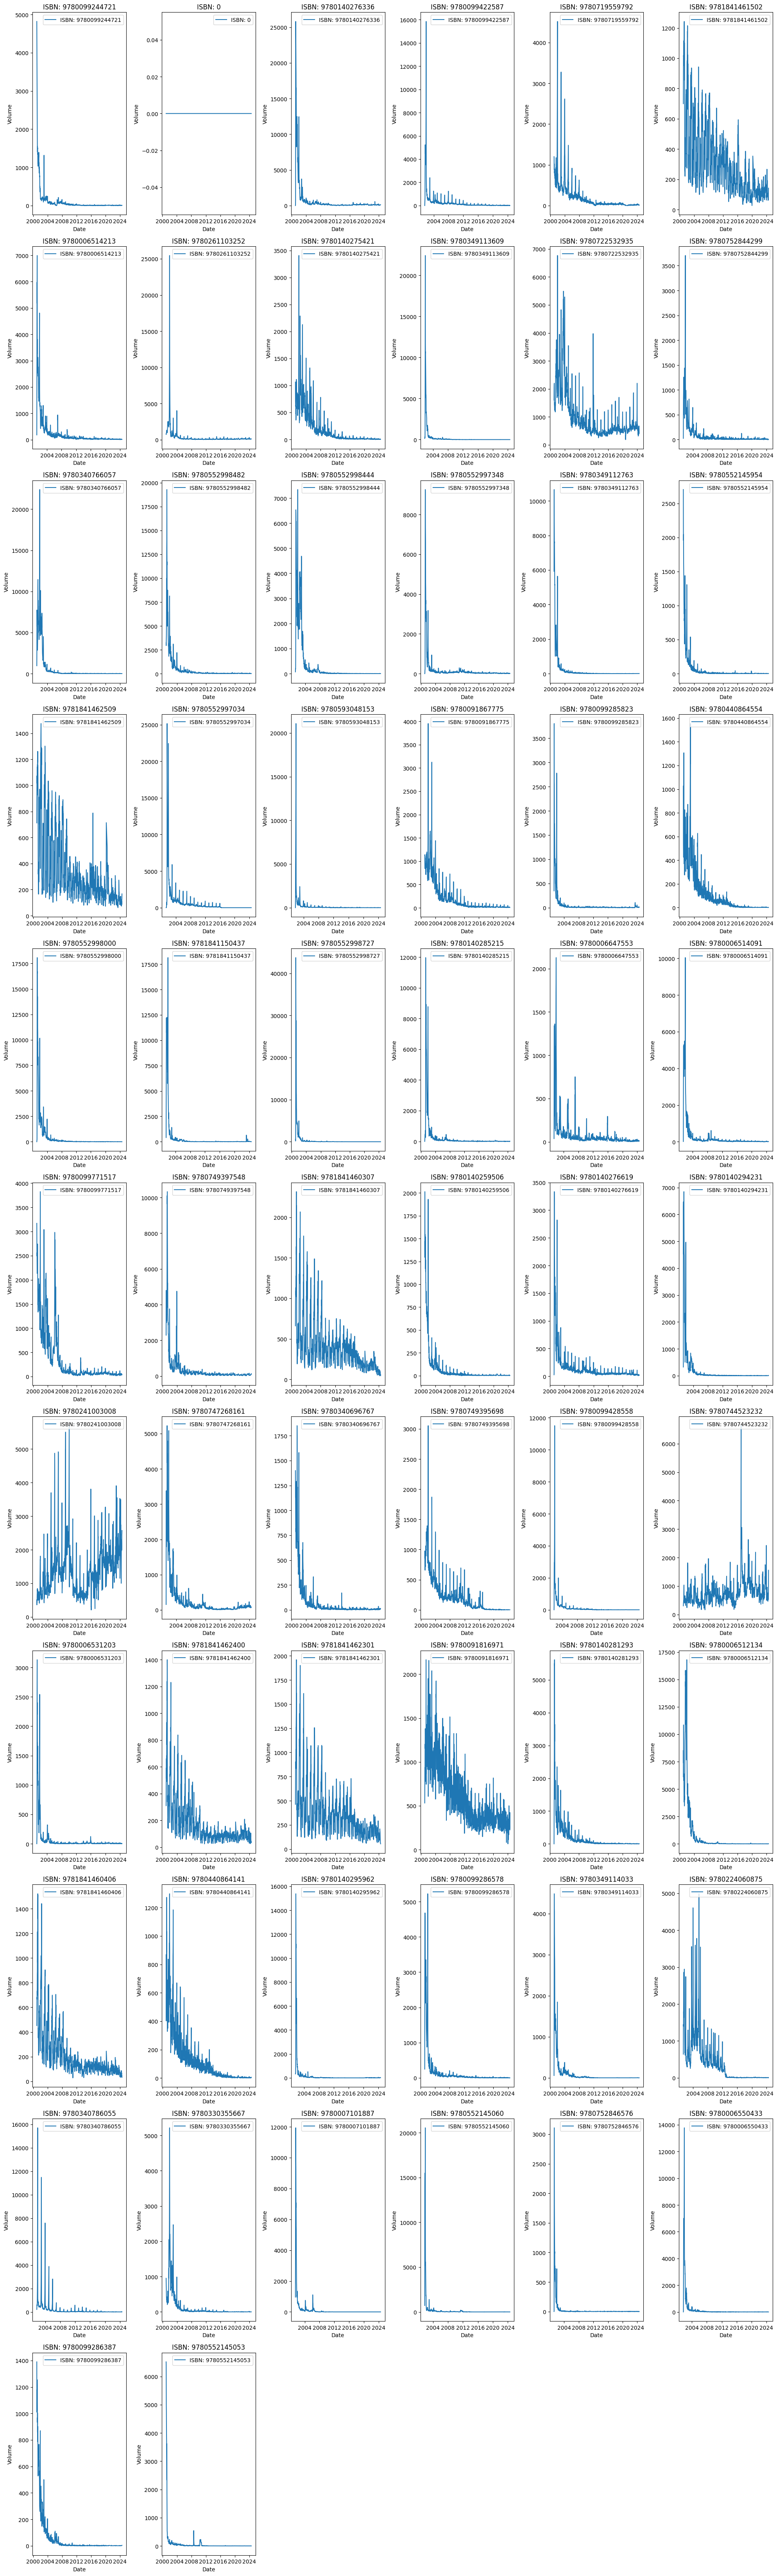

In [ ]:
# Create the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 6 * rows))

# Flatten the axes
axes = axes.flatten()

# Loop through each ISBN and plot the data from the weekly dataframe
for i, isbn in enumerate(isbn_filtered):
  # Filter the original weekly dataframe
  weekly_data_isbn = weekly_data[weekly_data['ISBN'] == isbn]

  # Plot the data
  axes[i].plot(weekly_data_isbn.index, weekly_data_isbn['Volume'], label=f'ISBN: {isbn}')
  axes[i].set_title(f'ISBN: {isbn}')
  axes[i].set_xlabel('Date')
  axes[i].set_ylabel('Volume')
  axes[i].legend()

# Remove unused subplots
for i in range(plot_grid, len(axes)):
  fig.delaxes(axes[i])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Plots for the list of ISBNs were generated.

###6. Investigate these plots to understand the general sales patterns, and comment on the general patterns visible in the data. Do the patterns drastically change for the period 1–12 years vs the period 12–24 years? Explain why or why not with possible reasons.

Yes, there is a significant change in sales patterns comparing the period 2000-2012 with 2012-2024. This could be due to other types taking over, most likely due to eBooks and audiobooks, but possibly also other types of entertainment such as streaming services, social media and podcasts.

###7. Select two books from the list (The Alchemist and The Very Hungry Caterpillar) for further analysis. Focus on the period >2012-01-01. Filter the sales data for both these books to retain the date range >2012-01-01, until the final datapoint.

In [ ]:
alchemist_isbns = isbn_data[isbn_data['Title'].str.contains('alchemist', case=False, na=False)]['ISBN'].astype(str).unique()
caterpillar_isbns = isbn_data[isbn_data['Title'].str.contains('caterpillar', case=False, na=False)]['ISBN'].astype(str).unique()

print("ISBNs for The Alchemist:")
print(alchemist_isbns)

print("ISBNs for The Very Hungry Caterpillar:")
print(caterpillar_isbns)

ISBNs for The Alchemist:
['9780722532935']
ISBNs for The Very Hungry Caterpillar:
['9780241003008' '9780140500875']


In [ ]:
# Filter the dates after 2012-01-01
weekly_data_2012 = weekly_data[weekly_data.index > '2012-01-01']

# select ISBN for The Alchemist
for isbn in alchemist_isbns:
  alchemist_data = weekly_data_2012[weekly_data_2012['ISBN'] == isbn]
  print(f"The Alchemist ISBN: {isbn}")

# select ISBN for The Very Hungry Caterpillar
for isbn in caterpillar_isbns:
  caterpillar_data = weekly_data_2012[weekly_data_2012['ISBN'] == isbn]
  print(f"The Very Hungry Caterpillar ISBN: {isbn}")



The Alchemist ISBN: 9780722532935
The Very Hungry Caterpillar ISBN: 9780241003008
The Very Hungry Caterpillar ISBN: 9780140500875


In [ ]:
# Now let's filter out the data for only the two ISBNs
book_data = weekly_data_2012[weekly_data_2012['ISBN'].isin(['9780241003008', '9780722532935'])]

# Preview
print(book_data.shape)
book_data.head()

(1256, 13)


,ISBN,Title,Author,Interval,Volume,Value,ASP,RRP,Binding,Imprint,Publisher_Group,Product_Class,Category
End_Date,,,,,,,,,,,,,
2012-01-08,9780241003008,"Very Hungry Caterpillar, The","Carle, Eric",201201,512,2522.13,4.9260,7.99,Hardback,Puffin Books,Penguin Grp,Y1.3 Picture Books,Children
2012-01-08,9780722532935,"Alchemist, The","Coelho, Paulo",201201,518,3601.76,6.9532,9.99,Paperback,Thorsons,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
2012-01-15,9780241003008,"Very Hungry Caterpillar, The","Carle, Eric",201202,519,2473.31,4.7655,7.99,Hardback,Puffin Books,Penguin Grp,Y1.3 Picture Books,Children
2012-01-15,9780722532935,"Alchemist, The","Coelho, Paulo",201202,533,3610.12,6.7732,9.99,Paperback,Thorsons,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction
2012-01-22,9780722532935,"Alchemist, The","Coelho, Paulo",201203,475,3105.62,6.5381,9.99,Paperback,Thorsons,HarperCollins Grp,F1.1 General & Literary Fiction,Fiction


In [ ]:
# Check the two unique titles
print(book_data['Title'].unique())

['Very Hungry Caterpillar, The' 'Alchemist, The']


In [ ]:
# Change the Titles to read 'The Alchemist' and 'The Very Hungry Caterpillar'
book_data['Title'] = book_data['Title'].str.replace(r'^(.*), The$', r'The \1', regex=True)

print(book_data['Title'].unique())

['The Very Hungry Caterpillar' 'The Alchemist']


In [ ]:
# Check for missing values
print(book_data.isnull().sum())

ISBN               0
Title              0
Author             0
Interval           0
Volume             0
Value              0
ASP                0
RRP                0
Binding            0
Imprint            0
Publisher_Group    0
Product_Class      0
Category           0
dtype: int64


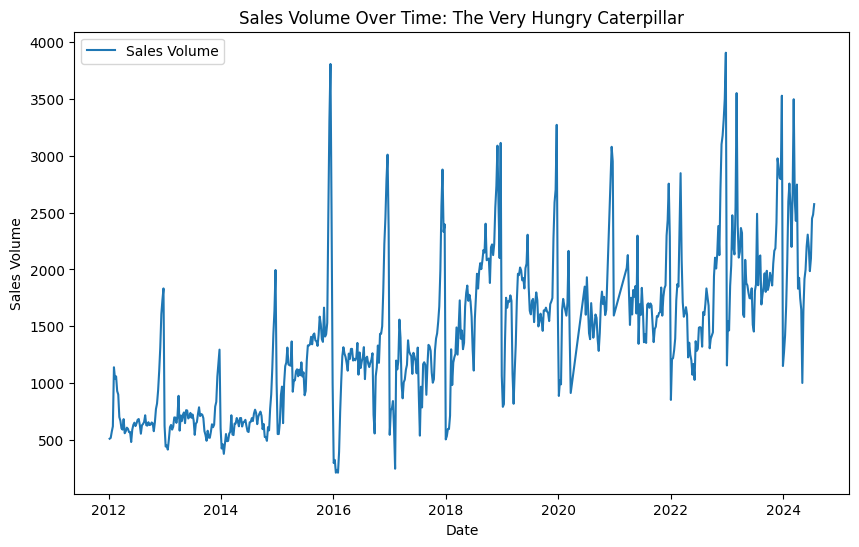

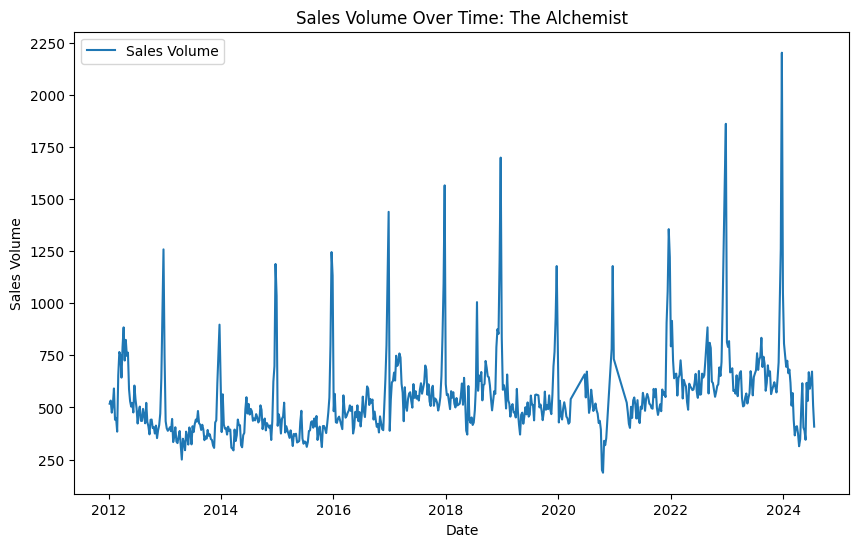

In [ ]:
# List ISBNs
book_isbns = ['9780241003008', '9780722532935']

for isbn in book_isbns:
    # Filter the specific book
    book_data_isbn = book_data[book_data['ISBN'] == isbn]

    # Get title of the specific book
    title = book_data_isbn['Title'].unique()[0]

    # Plot the sales volume over time
    plt.figure(figsize=(10, 6))
    plt.plot(book_data_isbn.index, book_data_isbn['Volume'], label='Sales Volume')
    plt.title(f'Sales Volume Over Time: {title}')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()

Sales volume data for the Very Hungry Caterpillar and The Alchemist were selected and plotted. These do not show the same decreasing sales trend as the other ISBNs.

#C. Classical techniques

###1. Perform decomposition on the data for both books. Determine what type of decomposition is suitable for each book, and comment on the components' characteristics.


The Very Hungry Caterpillar has an increasing trend and shows seasonality with peaks every 12 months. However, in more recent years there are multiple peaks. Also, several 'drops' (negative peaks) in sales volume can be noticed. Therefore, classical decomposition is not suitable here.
The Alchemist shows quite stable sales volume, although not completely linear. There is clear seasonality with peaks every 12 months. To be sure, I won't be using classical decomposition here. STL seems the most appropriate due to the handling of non-linear trends and any type of seasonality period. It is also robust to Outliers. X-11 is not appropriate as it only handles monthly/quarterly seasonality.

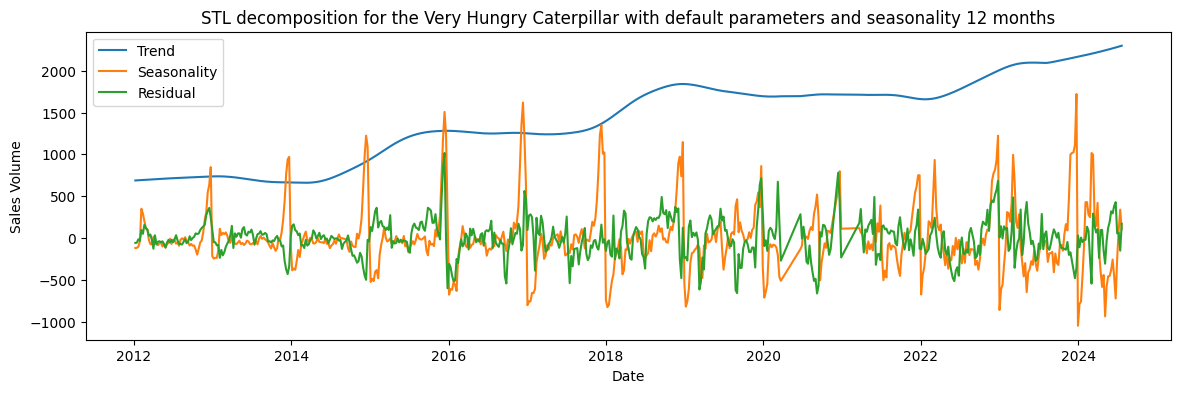

In [ ]:
# Perform decomposition using STL
book_data_caterpillar = book_data[book_data['ISBN'] == '9780241003008']

plt.figure(figsize=(14, 4))

st = STL(book_data_caterpillar['Volume'], period=52)
res = st.fit()

plt.plot(res.trend)
plt.plot(res.seasonal)
plt.plot(res.resid)
plt.title('STL decomposition for the Very Hungry Caterpillar with default parameters and seasonality 12 months')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(['Trend', 'Seasonality', 'Residual'])
plt.show()

An increasing trend can be seen which is quite linear. There is yearly seasonality, however there are more frequent peaks captured towards more recent years.

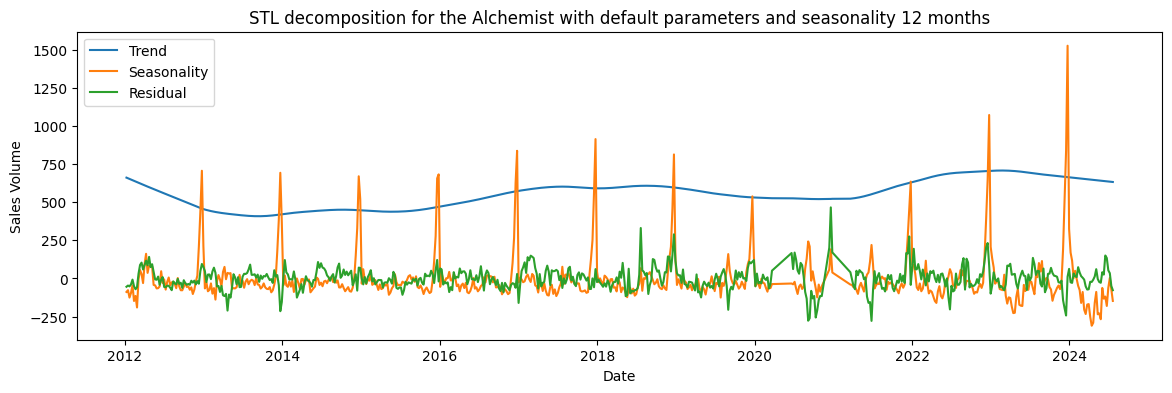

In [ ]:
# Plot the same for the Alchemist
book_data_alchemist = book_data[book_data['ISBN'] == '9780722532935']

plt.figure(figsize=(14, 4))

st = STL(book_data_alchemist['Volume'], period=52)
res = st.fit()

plt.plot(res.trend)
plt.plot(res.seasonal)
plt.plot(res.resid)
plt.title('STL decomposition for the Alchemist with default parameters and seasonality 12 months')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(['Trend', 'Seasonality', 'Residual'])
plt.show()

The trend is quite stable, but not completely linear. There is clear yearly seasonality.

###2. Perform ACF and PACF on both books. Comment on the results and what they indicate.

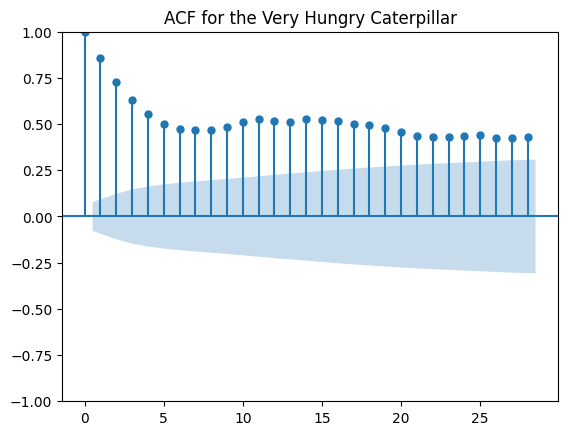

In [ ]:
# Create ACF plot
smgraphics.tsa.plot_acf(book_data_caterpillar['Volume'])
plt.title('ACF for the Very Hungry Caterpillar')
plt.show()

The ACF plot for the Very Hungry Caterpillar shows significant spikes on all lags, meaning that all legs show autocorrelation. It starts with a gradual decrease after which the autocorreltion stabilises around 0.50. It means that past values strongly influence future sales volume.

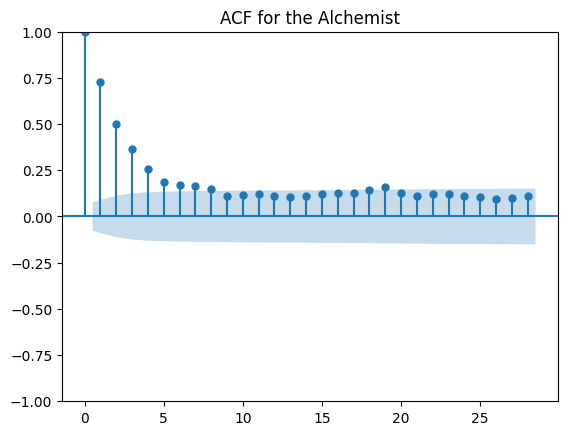

In [ ]:
# Plot ACF for the Alchemist
smgraphics.tsa.plot_acf(book_data_alchemist['Volume'])
plt.title('ACF for the Alchemist')
plt.show()

There are significant spikes showing autocorrelation up until lag 8. After this, there is no autocorrelation, except for one little spike which is significant (outside the blue zone) at lag 19. From lag 9 onwards, the past values do not significantly influence future sales volume, except for lag 19.

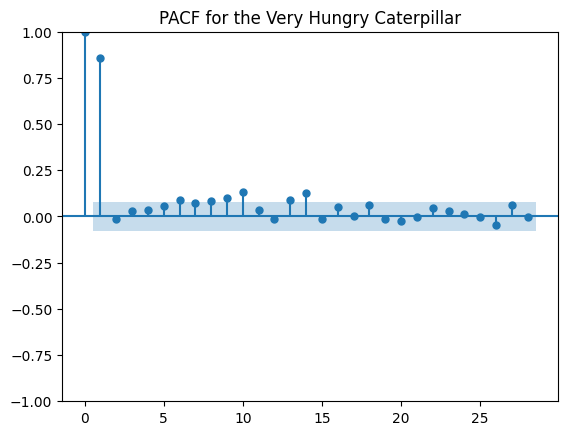

In [ ]:
# Plot PACF for the Very Hungry Caterpillar
smgraphics.tsa.plot_pacf(book_data_caterpillar['Volume'])
plt.title('PACF for the Very Hungry Caterpillar')
plt.show()

The PACF shows the direct correlation between past and future sales volume, removing the effect of values in between. In this case, the PACF is clearly significant in lag 1, 9, 10, and 14. There are a few margin lags as well (not completely outside the blue zone).

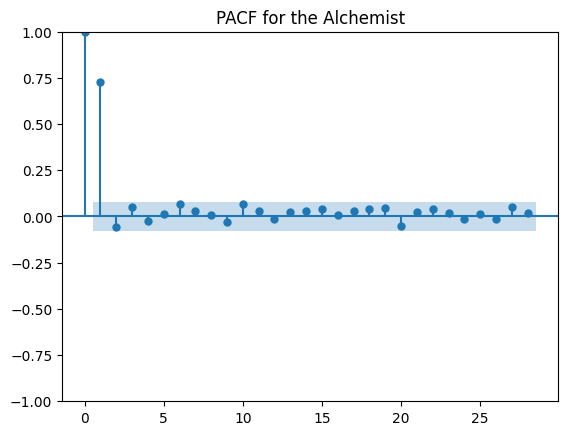

In [ ]:
# Plot PACF for the Alchemist
smgraphics.tsa.plot_pacf(book_data_alchemist['Volume'])
plt.title('PACF for the Alchemist')
plt.show()

There is a direct correlation shows for lag 1. After this, there is no direct correlation between past and future sales volume.

###3. Check for stationarity of the data for both books. Comment on the results and what they indicate.

In [ ]:
# Resample the data to ensure fixed intervals and fill missing weeks with 0
caterpillar_volume = book_data_caterpillar['Volume'].resample('W').sum().fillna(0)

# Calculate the differenced series
caterpillar_volume_diff = caterpillar_volume.diff().dropna()

In [ ]:
# import adf test
from statsmodels.tsa.stattools import adfuller

# perform ADF test
adf_result = adfuller(caterpillar_volume)
print('p-value original:', adf_result[1])

# perform ADF test on differenced data
adf_result_diff = adfuller(caterpillar_volume_diff)
print('p-value differenced:', adf_result_diff[1])

p-value original: 0.029616021527175906
p-value differenced: 1.242762309266303e-16


The null hypothesis s: The time series has a unit root and therefore is non-stationary.
The alternative hypothesis is: The time series does not have a unit root, so it is stationary.

Both p-values are under 0.05, so the null-hypothesis is rejected: the time-series is stationary.

In [ ]:
# Follow the same steps for the Alchemist data
alchemist_volume = book_data_alchemist['Volume'].resample('W').sum().fillna(0)

# Calculate the differenced series
alchemist_volume_diff = alchemist_volume.diff().dropna()

In [ ]:
# Perform the ADF test
adf_result = adfuller(alchemist_volume)
print('p-value original:', adf_result[1])

# perform ADF test on differenced data
adf_result_diff = adfuller(alchemist_volume_diff)
print('p-value differenced:', adf_result_diff[1])

p-value original: 4.139950997174928e-13
p-value differenced: 6.058806365373857e-20


Both p-values are very mall. Therefore the null-hypothesis is rejected and the conclusion is that the time-series is stationary.

Looking at the residuals in the decomposed plots, these findings are confimed as there does not seem to be a clear change in for example variance during time.

###4. Perform Auto ARIMA on both books. The forecast horizon is the final 32 weeks of data. All prior data (from 2012-01-01 onwards) can be used as the training data. Set reasonable bounds for Auto ARIMA's various parameters so that Auto ARIMA can identify the most suitable model.

In [ ]:
# Check the weeks in the caterpillar data
print(book_data_caterpillar.index.nunique())

628


In [ ]:
# Check the last 32 weeks in the caterpillar data
print(book_data_caterpillar.tail(32))

                     ISBN                        Title       Author  Interval  \
End_Date                                                                        
2023-12-17  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202350   
2023-12-24  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202351   
2023-12-31  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202352   
2024-01-07  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202401   
2024-01-14  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202402   
2024-01-21  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202403   
2024-01-28  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202404   
2024-02-04  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202405   
2024-02-11  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202406   
2024-02-18  9780241003008  The Very Hungry Caterpillar  Carle, Eric    202407   
2024-02-25  9780241003008  T

In [ ]:
# Define train and test data
train_data = caterpillar_volume[:'2023-12-10']
test_data = caterpillar_volume['2023-12-17':]

print(f"number of weeks from 2023-12-17 onward: {len(test_data)}")

number of weeks from 2023-12-17 onward: 32


In [ ]:
# view dataframe
caterpillar_volume.head()

,Volume
End_Date,
2012-01-08,512
2012-01-15,519
2012-01-22,574
2012-01-29,621
2012-02-05,1140


In [ ]:
# Perform auto ARIMA
model = auto_arima(y=train_data,
                   seasonal=True,
                   m=52,
                   max_p=2, max_q=2,
                   max_P=1, max_Q=1,
                   max_d=1, max_D=1,
                   max_order=5,
                   stepwise=True,
                   suppress_warnings=True,
                   error_action='ignore',
                   trace=True)

# Print model results
print('Best model for The Very Hungry Caterpillar')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=20.87 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=9140.609, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=9056.517, Time=5.71 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=9086.169, Time=3.98 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=9138.670, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=9142.482, Time=0.07 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=9035.189, Time=8.73 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=9086.201, Time=3.64 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=9035.654, Time=8.28 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=9032.876, Time=13.83 sec
 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=9085.092, Time=4.03 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=9055.139, Time=7.05 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=9140.826, Time=0.23 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=18.92 sec
 ARIMA(1,1,1)(1,0,1)[52] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  623
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 52)   Log Likelihood               -4484.485
Date:                            Mon, 18 Aug 2025   AIC                           8978.969
Time:                                    09:48:50   BIC                           9001.134
Sample:                                01-08-2012   HQIC                          8987.583
                                     - 12-10-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7747      0.028     27.974      0.000       0.720       0.829
ma.L1         -0.9749      0.011    -92.761      0.000      -0.995      -0.954
ar.S.L52       0.7528      0.043     17.525      0.000       0.669       0.837
ma.S.L52      -0.4474      0.059     -7.636      0.000      -0.562      -0.333
sigma2      1.048e+05   2972.422     35.268      0.000     9.9e+04    1.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):              5816.75
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# rename model caterpillar_arima
caterpillar_arima = model

In [ ]:
# Define train and test data for the Alchemist
train_data = alchemist_volume[:'2023-12-10']
test_data = alchemist_volume['2023-12-17':]

print(f"number of weeks from 2023-12-17 onward: {len(test_data)}")

number of weeks from 2023-12-17 onward: 32


In [ ]:
# Perform auto ARIMA
model = auto_arima(y=train_data,
                   seasonal=True,
                   m=52,
                   max_p=2, max_q=2,
                   max_P=1, max_Q=1,
                   max_d=1, max_D=1,
                   max_order=5,
                   stepwise=True,
                   suppress_warnings=True,
                   error_action='ignore',
                   trace=True)

# Print model results
print('Best model for The Alchemist')
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=17.82 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=7990.293, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=5.03 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=7838.866, Time=4.00 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=7988.309, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=7990.623, Time=0.17 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=7655.665, Time=7.55 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=7708.346, Time=4.14 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=7696.062, Time=6.04 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=13.00 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=7637.139, Time=8.63 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=7807.908, Time=5.79 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=7685.867, Time=7.40 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=7955.193, Time=0.25 sec
 ARIMA(1,1,2)(1,0,1)[52] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  623
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 52)   Log Likelihood               -3812.571
Date:                              Mon, 18 Aug 2025   AIC                           7635.142
Time:                                      09:51:11   BIC                           7657.306
Sample:                                  01-08-2012   HQIC                          7643.756
                                       - 12-10-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3039      0.023    -13.077      0.000      -0.349      -0.258
ma.L2         -0.1904      0.031     -6.059      0.000      -0.252      -0.129
ar.S.L52       0.8693      0.018     49.223      0.000       0.835       0.904
ma.S.L52      -0.4189      0.030    -13.962      0.000      -0.478      -0.360
sigma2      1.164e+04    314.939     36.953      0.000     1.1e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1722.13
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# rename model alchemist_arima
alchemist_arima = model

The best models for each book using Auto ARIMA were obtained on all data from 2012 onwards, except for the last 32 weeks (the forecasting horizon). Small bounds were used due to prevent crashing of the system and improve runtime.

###5. Comment on the best model provided by Auto ARIMA for both books.

The Very Hungry Caterpillar model output after the first run. These outputs may change when I run the model again later.

The number of observations is 623, which stands for the 623 weeks.
The best model is SARIMAX(1, 1, 1)x(1, 0, 1, 52), which stands for 1 AR term, 1 difference, and 1 MA term. The seasonal part has 1 AR term, 0 differencing and 1 MA term. 52 stands for the yearly seasonality (52 weeks).
Log Likelihood is -4484.485. As higher values closer to zero or positive are better, this Log Likelihood value does not seem great.
AIC is 8978.969, BIC is 9001.134, and HQIC is 8987.583, which all seem quite high and thus not great.
The covariance type is opg, which is the method used to calculate the parameters.

No intercept is specified in the output due to the way the model hyperparameters were performed.
ar.L1 is 0.7748, with a p value of 0.000, which means there is a significant relationship between the previous and current value of book sales volume.
ma.L1	is -0.9749 with p 0.000, showing a significant influence of the previous error on the current value, which the model is correcting (negative value).
ma.S.L52	is -0.4473 with p 0.000, showing a significant influence of the seasonal error from the previous year on the current year sales. The error decreases the current year's sales volume.
sigma2 is 1.048e+05 with a small p value of 0.000, suggesting a good model fit.
Ljung-Box is 0.90, showing that there is no significant autocorrelation. As we could see significant autocorrelation before with the ACF and PACF tests, this means that the model has captured all patterns in the data.
Jarque-Bera is 5815.94 with a probability of 0.00, means that the residuals are not normally distributed and there may be patterns not captured by the model.
Heteroskedasticity is 5.28 with probability of 0.00, meaning significant heteroskedasticity and the model could be improved.
Skewness is 0.90, which means the residuals are skewed to the right.
Kurtosis is 17.87, which means that the distribution of residuals has a long tail and thus shows extreme outliers.

Conclusion:
The significant coefficients, in particular sigma2 suggest a good model fit. However, the high values for Log likelihod, AIC and BIC are not great. The residuals also show significant issues such as outliers. The model could thus be improved and refined.

The Alchemist model output after the first run. These outputs may change when I run the model again later.

The best model is: Model:	SARIMAX(0, 1, 2)x(1, 0, [1], 52)
Again, there is a low Log Likelihood of -3812.571. AIC, BIC and HQIC are again high: respectively ,7635.142, 7657.306, and 7643.756. The coeficients are significant, including sigma2, suggesting a good model fit (all p values are 0.000). The Ljung-Box is 0.07, which is not significant (but close to p of 0.05). This means that there is no autocorrelation, although the output could be stronger. There is also heteroskedasticity (3.01), skewnes (0.77) and kurtosis (11.01), suggesting there are issues with the distribution of residuals.

Conclusion: coeficients suggest that the model is a good fit, but the AIC, BIC and log likelihood contradict this finding. There are also issues with the distribution of residuals. The model thus has room for improvement.


###6. Find the residuals of the 'best' model for both books. Comment on the residuals.

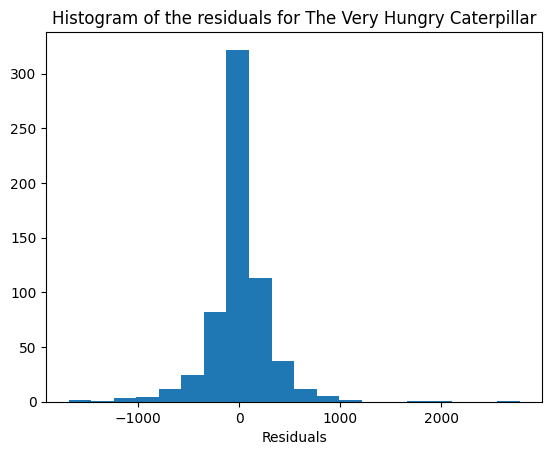

<Figure size 640x480 with 0 Axes>

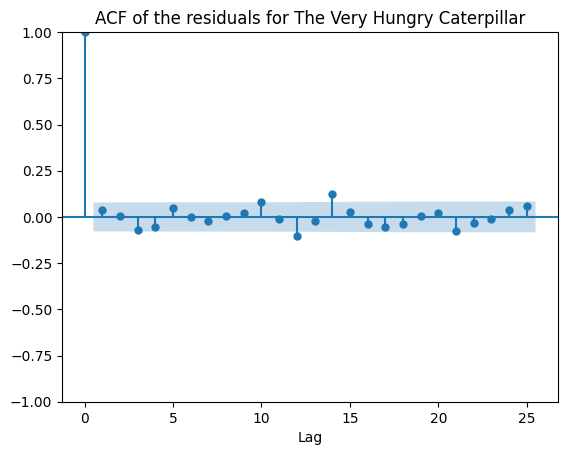

In [ ]:
# Plot the histogram of the residuals for The Very Hungry Caterpilar
plt.hist(caterpillar_arima.resid()[1:], bins=20)
plt.title('Histogram of the residuals for The Very Hungry Caterpillar')
plt.xlabel('Residuals')

# Plot the ACF of the residuals
plt.figure()
smgraphics.tsa.plot_acf(caterpillar_arima.resid()[1:], lags=25)
plt.title('ACF of the residuals for The Very Hungry Caterpillar')
plt.xlabel('Lag')
plt.show()

The histogram of the residuals seems quite normally distributed. There are tails on both sides, but skewness and kurtosis are not very evident. There is some significant autocorrelation in the ACF plot of the residuals around lag 12 and 14, meaning that the model has not completely captured the patterns in the data.

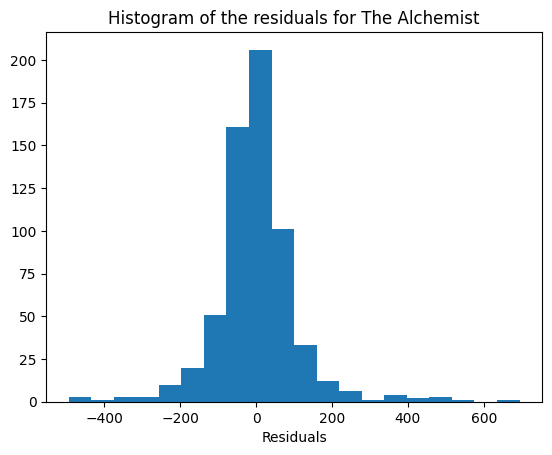

<Figure size 640x480 with 0 Axes>

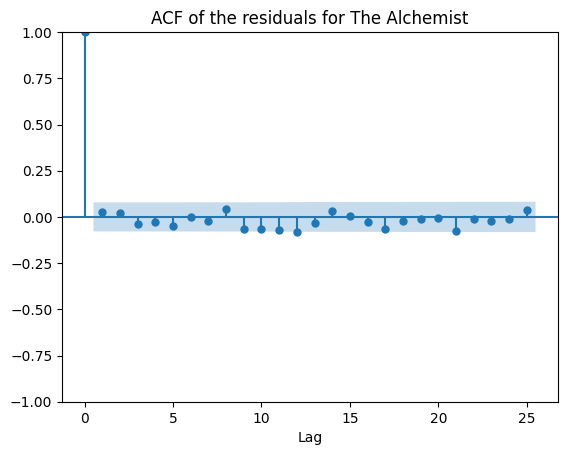

In [ ]:
# Plot the histogram of the residuals for The Alchemist
plt.hist(alchemist_arima.resid()[1:], bins=20)
plt.title('Histogram of the residuals for The Alchemist')
plt.xlabel('Residuals')

# Plot the ACF of the residuals
plt.figure()
smgraphics.tsa.plot_acf(alchemist_arima.resid()[1:], lags=25)
plt.title('ACF of the residuals for The Alchemist')
plt.xlabel('Lag')
plt.show()

The residuals for the Alchemist auto ARIMA model seem quite normally distributed with slight skewness to the right. The ACF plot of residuals shows no significant autocorrelation, meaning that the model captures the patterns in the data well.

###7. Use the best model to predict the final 32 weeks of data. Plot the prediction along with the confidence intervals for both books.

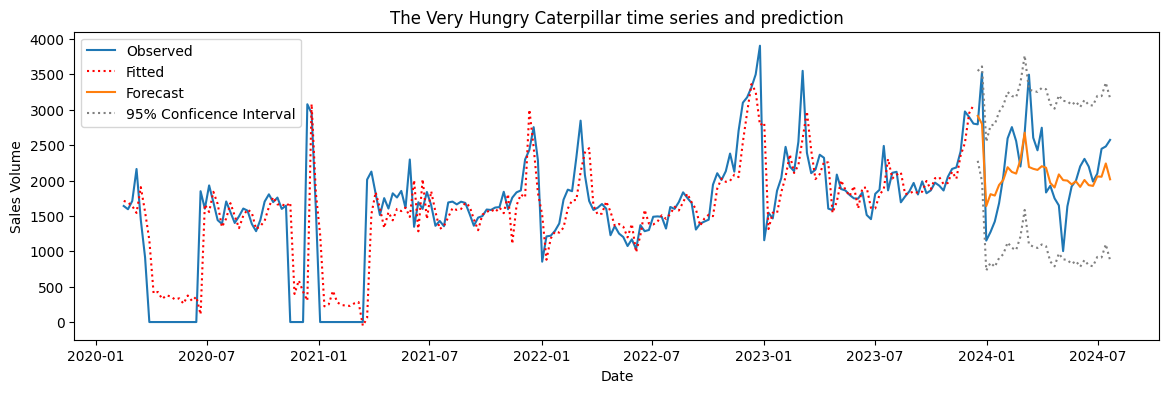

In [ ]:
predictions = caterpillar_arima.predict(n_periods=32, return_conf_int=True, alpha=0.05)

# Visualise the model preditions
N_plot = 200
plt.figure(figsize=(14, 4))
plt.plot(caterpillar_volume.index[(len(train_data)-N_plot):], caterpillar_volume[(len(train_data)-N_plot):], label='Actual')
plt.plot(caterpillar_volume.index[(len(train_data)-N_plot):len(train_data)], caterpillar_arima.fittedvalues()[(len(train_data)-N_plot):len(train_data)], ':', c='red', label='Fitted')
plt.plot(caterpillar_volume.index[len(train_data):], predictions[0]) # forecasted values
plt.plot(caterpillar_volume.index[len(train_data):], predictions[1][:, 0], ':', c='grey') # lower confidence interval
plt.plot(caterpillar_volume.index[len(train_data):], predictions[1][:, 1], ':', c='grey') # upper confidence interval
plt.title('The Very Hungry Caterpillar time series and prediction')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(['Observed', 'Fitted', 'Forecast', '95% Conficence Interval']),
plt.show()

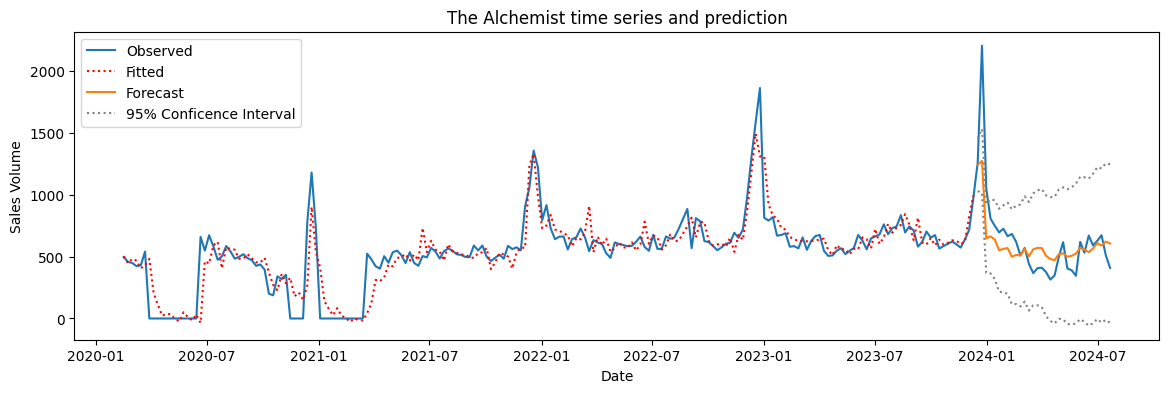

In [ ]:
predictions = alchemist_arima.predict(n_periods=32, return_conf_int=True, alpha=0.05)

# Visualise the model preditions
N_plot = 200
plt.figure(figsize=(14, 4))
plt.plot(alchemist_volume.index[(len(train_data)-N_plot):], alchemist_volume[(len(train_data)-N_plot):], label='Actual')
plt.plot(alchemist_volume.index[(len(train_data)-N_plot):len(train_data)], alchemist_arima.fittedvalues()[(len(train_data)-N_plot):len(train_data)], ':', c='red', label='Fitted')
plt.plot(alchemist_volume.index[len(train_data):], predictions[0]) # forecasted values
plt.plot(alchemist_volume.index[len(train_data):], predictions[1][:, 0], ':', c='grey') # lower confidence interval
plt.plot(alchemist_volume.index[len(train_data):], predictions[1][:, 1], ':', c='grey') # upper confidence interval
plt.title('The Alchemist time series and prediction')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.legend(['Observed', 'Fitted', 'Forecast', '95% Conficence Interval']),
plt.show()

###8. Comment on how the prediction compares with the actual values.

The prediction of the Very Hungry Caterpillar data seems within the same average range as the actual values, but seems to miss some of the spikes in the data pattern.
The prediction of the Alchemist data follows a pattern more closely to the actual data, but also seems to not completely capture a significant spike around the cutoff date.

#D. Machine learning and deep learning techniques

###1. Prepare the data to feed into the machine learning models. The forecast horizon is 32 weeks. The training data consists of all prior data, up to 2012-01-01.

In [ ]:
# Check the dataframe head for caterpillar_volume
caterpillar_volume.head()

,Volume
End_Date,
2012-01-08,512
2012-01-15,519
2012-01-22,574
2012-01-29,621
2012-02-05,1140


In [ ]:
# Check the dataframe head for alchemist_volume
alchemist_volume.head()

,Volume
End_Date,
2012-01-08,518
2012-01-15,533
2012-01-22,475
2012-01-29,514
2012-02-05,591


In [ ]:
# check that the index is of datetime type
print(caterpillar_volume.index.dtype)
print(alchemist_volume.index.dtype)

datetime64[ns]
datetime64[ns]


End_Date is still the index and of the datetime64 type. The only variable is Volume.

In [ ]:
# Define train and test data with the same cutoff as before (32 weeks)
caterpillar_train = caterpillar_volume[:'2023-12-10']
caterpillar_test = caterpillar_volume['2023-12-17':]
alchemist_train = alchemist_volume[:'2023-12-10']
alchemist_test = alchemist_volume['2023-12-17':]

print(f"number of weeks from 2023-12-17 onward: {len(caterpillar_test)}")
print(f"number of weeks from 2023-12-17 onward: {len(alchemist_test)}")

number of weeks from 2023-12-17 onward: 32
number of weeks from 2023-12-17 onward: 32


The cutoff date is set at 32 weeks.

In [ ]:
# Transform to index.to_period as the later steps with sktime returns an error when using datetime type and prefer period over datetime
caterpillar_train.index = caterpillar_train.index.to_period("W")
caterpillar_test.index = caterpillar_test.index.to_period("W")
alchemist_train.index = alchemist_train.index.to_period("W")
alchemist_test.index = alchemist_test.index.to_period("W")

The index is changed transformed in to_period, which is required to run the XGBoost model with sktime later on.

In [ ]:
# Create the input-output pairs for XGBoost
def create_input_output_pairs(lookback, forecast, sequence_data):
  input_sequences = []
  output_sequences = []

  for i in range(lookback, len(sequence_data) - forecast):
    input_sequences.append(sequence_data[i-lookback:i])
    output_sequences.append(sequence_data[i:i+forecast])

  return input_sequences, output_sequences

A function to create input-output pairs was defined.

In [ ]:
# Create a function for training XGBoost model for timeseries analysis
def train_xgboost_model(train_inputs, train_outputs):
  train_inputs = np.array(train_inputs)
  train_outputs = np.array(train_outputs)

  # Create the model
  model = XGBRegressor(
      n_estimators=400,
      max_depth=7,
      subsample=0.5
  )

  # Train the model
  model.fit(train_inputs, train_outputs)

  return model

A function to train the initial XGBoost model with default hyperparameters was defined with n_estimators=400, max_depth=7, subsample=0.5.

In [ ]:
# Create a prediction function with the XGBoost model
def xgboost_predictions(model, test_input):
  prediction = model.predict(np.asarray([test_input]))

  return prediction[0]

An XGBoost prediction function was defined.

In [ ]:
# Create a function for validation using the Walk-Forward Method
def walk_forward_val(train_set, test_set):
  predictions = list()

  train_input, train_output = create_input_output_pairs(12, 1, train_set)
  test_input, test_output = create_input_output_pairs(12, 1, test_set)

  model = train_xgboost_model(train_input, train_output)

  for i in range(len(test_input)):
    prediction = xgboost_predictions(model, test_input[i])
    predictions.append(prediction)
    print('expected =', test_output[i], ', predicted= = ', prediction)

  test_values = np.asarray(test_output).flatten()
  error = mean_absolute_error(np.asarray(test_output).flatten(), predictions)

  return error, np.asarray(test_output).flatten(), predictions

A function was defined for Walk-Forward validation.

In [ ]:
# Run the model to obtain the first outputs
train_set = caterpillar_train.values
test_set = caterpillar_test.values

mae, test_values, predictions = walk_forward_val(train_set, test_set)
print('MAE: %.3f'% mae)

expected = [3496] , predicted= =  2611.0386
expected = [2605] , predicted= =  2430.8447
expected = [2427] , predicted= =  2497.3062
expected = [2746] , predicted= =  1299.1547
expected = [1831] , predicted= =  2096.673
expected = [1926] , predicted= =  1820.342
expected = [1748] , predicted= =  1461.6353
expected = [1648] , predicted= =  1401.144
expected = [1002] , predicted= =  1656.9377
expected = [1635] , predicted= =  1164.7852
expected = [1917] , predicted= =  1473.9236
expected = [1997] , predicted= =  2123.6375
expected = [2200] , predicted= =  2318.6086
expected = [2306] , predicted= =  2192.476
expected = [2197] , predicted= =  1974.4579
expected = [1985] , predicted= =  2197.215
expected = [2097] , predicted= =  2029.1544
expected = [2448] , predicted= =  2094.7908
expected = [2482] , predicted= =  1915.2286
MAE: 359.495


The first model was run resulting in a Mean Absolute Error of 359.495

In [ ]:
# Create a list of None values with the same length as the training set
actual_padding = [None] * len(train_set)

# Combine the training and test values for full set
actual_values = list(train_set) + list(test_values)

# Add the None list to the predictions
forecast_values = list(actual_padding) + list(predictions)

Two lists were created: one with the actual values and one with the forecasted values (predictions).

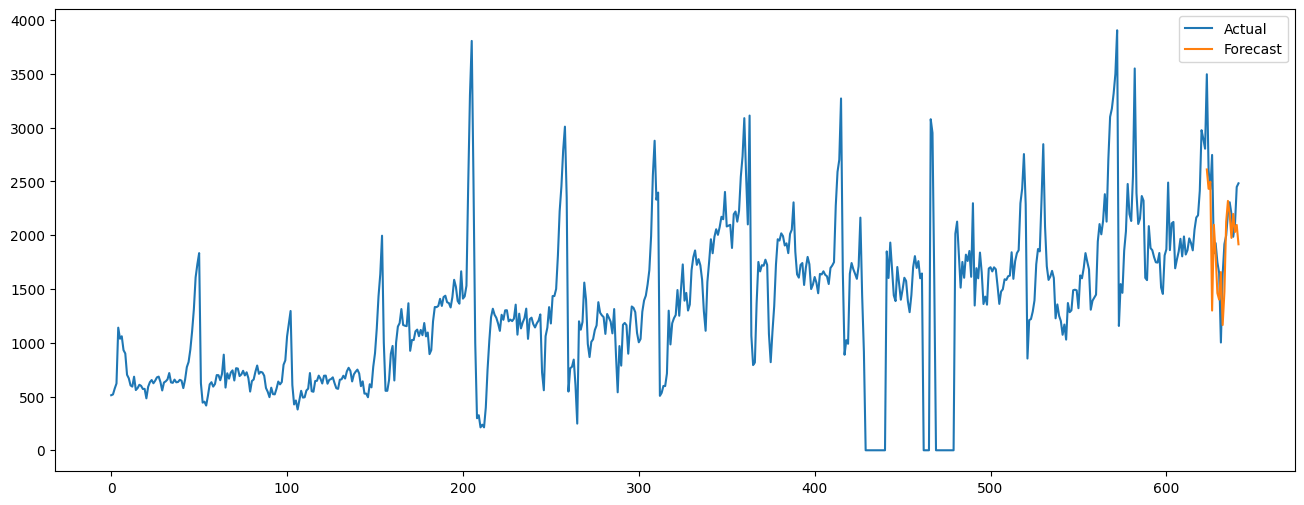

In [ ]:
# Create a dataframe for visualisation
visualisation_xgb = pd.DataFrame({"Actual": actual_values, "Forecast": forecast_values})
visualisation_xgb.plot(figsize=(16, 6))
plt.show()

The predictions were plotted together with the actual values.

In [ ]:
# Set the hyperparameter tuning values and ranges
param_tuning = {
    'max_depth': hp.quniform("max_depth", 3, 18, 1),
    'gamma': hp.uniform ('gamma', 0, 5),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'n_estimators': 100,
    'seed': 0
}

Hyperparameter tuning values and ranges were defined.

In [ ]:
# Define function for hyperparameter tuning
def auto_tune_training(param_tuning):
  train_set = caterpillar_train.values
  test_set = caterpillar_test.values
  train_input, train_output = create_input_output_pairs(12, 1, train_set)
  test_input, test_output = create_input_output_pairs(12, 1, test_set)
  model = XGBRegressor(
      n_estimators=int(param_tuning['n_estimators']),
      max_depth=int(param_tuning['max_depth']),
      gamma=param_tuning['gamma'],
      reg_alpha=int(param_tuning['reg_alpha']),
      colsample_bytree=param_tuning['colsample_bytree'],
      min_child_weight=int(param_tuning['min_child_weight']),
      eval_metric="auc",
      early_stopping_rounds=10
  )

  evaluation = [(train_input, train_output), (test_input, test_output)]

  model.fit(train_input, train_output,
            eval_set=evaluation,
            verbose=False)

  prediction = model.predict(test_input)
  predictions = prediction.flatten()
  accuracy = mean_absolute_error(test_output, prediction)
  print("MAE: %.3f" % accuracy)

  return {'loss': accuracy, 'status': STATUS_OK, 'model': model}

A function for hyperparameter tuning was defined.

In [ ]:
# Run the hyperparameter tuning
trials = Trials()
best = fmin(fn=auto_tune_training,
            space=param_tuning,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

MAE: 653.002
MAE: 743.976
MAE: 733.117
MAE: 651.101
MAE: 729.247
MAE: 714.318
MAE: 668.694
MAE: 683.346
MAE: 756.048
MAE: 759.453
MAE: 724.284
MAE: 722.119
MAE: 723.862
MAE: 729.026
MAE: 719.335
MAE: 701.860
MAE: 712.353
MAE: 738.714
MAE: 714.693
MAE: 721.417
MAE: 649.243
MAE: 649.262
MAE: 649.282
MAE: 722.597
MAE: 719.248
MAE: 653.841
MAE: 653.279
MAE: 728.571
MAE: 653.372
MAE: 640.485
MAE: 673.233
MAE: 642.703
MAE: 723.644
MAE: 643.877
MAE: 722.635
MAE: 713.315
MAE: 644.229
MAE: 714.267
MAE: 717.496
MAE: 679.707
MAE: 730.322
MAE: 756.881
MAE: 669.060
MAE: 724.864
MAE: 643.026
MAE: 712.748
MAE: 733.492
MAE: 752.911
MAE: 725.976
MAE: 721.936
MAE: 660.045
MAE: 713.785
MAE: 708.986
MAE: 721.524
MAE: 737.323
MAE: 731.433
MAE: 745.457
MAE: 668.739
MAE: 715.007
MAE: 724.220
MAE: 720.974
MAE: 643.240
MAE: 727.722
MAE: 673.118
MAE: 738.327
MAE: 643.058
MAE: 653.418
MAE: 643.305
MAE: 660.054
MAE: 649.411
MAE: 650.169
MAE: 751.658
MAE: 761.650
MAE: 657.812
MAE: 642.779
MAE: 644.375
MAE: 640.812

In [ ]:
# Print the output
print("Best hyperparameters: ", best)

Best hyperparameters:  {'colsample_bytree': 0.9518406203801524, 'gamma': 2.42137692751505, 'max_depth': 7.0, 'min_child_weight': 5.0, 'reg_alpha': 167.0}


Hyperparameter tuning was performed, showing the best hyperparameters.

Next, I will remove seasonality and trend to prepare the data for timeseries forecasting with XGBoost.

###2. Create the required pipeline for the XGBoost model.

In [ ]:
# Create the pipeline that includes detrending and deseasonalising
def pipeline_xgb(sp=12, degree=1):

  # Define XGB regressor
  regressor = XGBRegressor(
      n_estimators=400,
      max_depth=7,
      learning_rate=0.1,
      subsample=0.5,
      tree_method='gpu_hist',
      gpu_id=0, # to use GPU
      random_state=42
  )

  # Define forecaster
  forecaster = TransformedTargetForecaster([
    ("deseasonalize", Deseasonalizer(model="additive", sp=sp)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=degree))),
    ("forecast", make_reduction(regressor, window_length=12, strategy="recursive"))
    ])

  return forecaster

An XGBoost pipeline was created, which includes detrending, deseasonalising, the XGBoost regressor and the forecaster.

###3. Perform cross-validation.

In [ ]:
# Define function to perform the grid search with cross-validation
def grid_search_crossval(train, test, predictor, param_grid):

  # Perform grid search
  cv = ExpandingWindowSplitter(initial_window=int(len(train) * 0.7))
  gscv = ForecastingGridSearchCV(
      predictor,
      strategy="refit",
      cv=cv,
      param_grid=param_grid,
      scoring = MeanAbsolutePercentageError(symmetric=True),
      error_score="raise"
      )

  gscv.fit(train)
  print("Best parameters:", gscv.best_params_)

  # Forecast
  future_horizon = np.arange(len(test)) + 1
  predictions = gscv.predict(fh=future_horizon)

  return predictions

A function was defined to perform the grid search and crossvalidation.

In [ ]:
# Perform cross-validation
predictor = pipeline_xgb()

# Fit on training data directly (no grid search)
predictor.fit(caterpillar_train)

# Predict for the test set horizon
fh = np.arange(1, len(caterpillar_test) + 1)
y_pred = predictor.predict(fh)

The XGBoost pipeline was fit on the Caterpillar data.

###4. Perform parameter tuning (including window_length) using grid search.

In [ ]:
# Set the window length (only two options to improve computing time)
param_grid = {"window_length": [26, 52]}

# Perform the grid search
predictions = grid_search_crossval(caterpillar_train, caterpillar_test, predictor, param_grid)

Best parameters: {'window_length': 52}


The grid search shows that the best parameter for window_length is 52.

In [ ]:
# Do the same for the Alchemist data (I will perform all steps here so it is not needed to rename all variables into caterpillar/alchemist)
# Run the model to obtain the first outputs
train_set = alchemist_train.values
test_set = alchemist_test.values

mae, test_values, predictions = walk_forward_val(train_set, test_set)
print('MAE: %.3f'% mae)

expected = [440] , predicted= =  615.81635
expected = [366] , predicted= =  613.30566
expected = [406] , predicted= =  595.9812
expected = [410] , predicted= =  518.4784
expected = [375] , predicted= =  470.4457
expected = [314] , predicted= =  399.6202
expected = [347] , predicted= =  378.95468
expected = [498] , predicted= =  272.55917
expected = [616] , predicted= =  436.22064
expected = [404] , predicted= =  774.74225
expected = [389] , predicted= =  492.5532
expected = [345] , predicted= =  331.1435
expected = [618] , predicted= =  354.3622
expected = [531] , predicted= =  761.7412
expected = [669] , predicted= =  541.78235
expected = [590] , predicted= =  825.0379
expected = [627] , predicted= =  573.52423
expected = [672] , predicted= =  687.1856
expected = [510] , predicted= =  571.0983
MAE: 148.125


In [ ]:
# Create a list of None values with the same length as the training set
actual_padding = [None] * len(train_set)

# Combine the training and test values for full set
actual_values = list(train_set) + list(test_values)

# Add the None list to the predictions
forecast_values = list(actual_padding) + list(predictions)

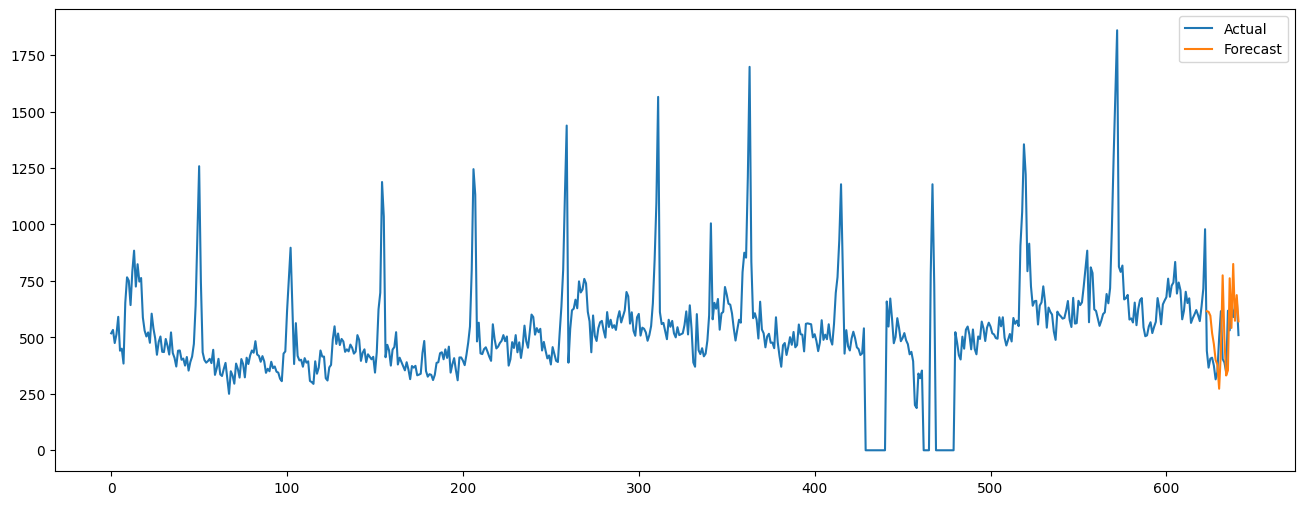

In [ ]:
# Create a dataframe for visualisation
visualisation_xgb = pd.DataFrame({"Actual": actual_values, "Forecast": forecast_values})
visualisation_xgb.plot(figsize=(16, 6))
plt.show()

In [ ]:
# Run the hyperparameter tuning
trials = Trials()
best = fmin(fn=auto_tune_training,
            space=param_tuning,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

MAE: 720.941
MAE: 737.605
MAE: 735.039
MAE: 756.032
MAE: 751.632
MAE: 755.678
MAE: 745.450
MAE: 723.941
MAE: 745.178
MAE: 762.906
MAE: 747.548
MAE: 722.111
MAE: 726.782
MAE: 723.782
MAE: 720.062
MAE: 746.490
MAE: 668.407
MAE: 668.977
MAE: 671.537
MAE: 727.253
MAE: 668.970
MAE: 653.570
MAE: 653.549
MAE: 653.528
MAE: 653.437
MAE: 718.218
MAE: 701.013
MAE: 657.064
MAE: 725.879
MAE: 649.751
MAE: 718.916
MAE: 714.593
MAE: 648.140
MAE: 714.655
MAE: 659.377
MAE: 753.825
MAE: 720.772
MAE: 684.386
MAE: 749.987
MAE: 747.512
MAE: 713.801
MAE: 736.311
MAE: 681.224
MAE: 736.759
MAE: 709.387
MAE: 709.528
MAE: 748.364
MAE: 713.569
MAE: 753.967
MAE: 719.221
MAE: 684.662
MAE: 723.070
MAE: 668.424
MAE: 680.361
MAE: 720.631
MAE: 679.880
MAE: 724.574
MAE: 710.567
MAE: 756.708
MAE: 736.624
MAE: 723.096
MAE: 672.296
MAE: 643.337
MAE: 747.017
MAE: 628.274
MAE: 628.252
MAE: 640.497
MAE: 738.337
MAE: 756.050
MAE: 651.012
MAE: 737.717
MAE: 756.033
MAE: 719.293
MAE: 719.271
MAE: 643.219
MAE: 653.676
MAE: 752.812

In [ ]:
# Print the output
print("Best hyperparameters: ", best)

Best hyperparameters:  {'colsample_bytree': 0.9270598241093112, 'gamma': 4.222353351134146, 'max_depth': 16.0, 'min_child_weight': 4.0, 'reg_alpha': 166.0}


In [ ]:
# Perform cross-validation
predictor = pipeline_xgb()

# Fit on training data directly (no grid search)
predictor.fit(alchemist_train)

# Predict for the test set horizon
fh = np.arange(1, len(alchemist_test) + 1)
y_pred = predictor.predict(fh)

In [ ]:
# Perform grid search for parameter tuning
# Set the window length (only two options to improve computing time)
param_grid = {"window_length": [26, 52]}

# Perform the grid search
predictions = grid_search_crossval(alchemist_train, alchemist_test, predictor, param_grid)

Best parameters: {'window_length': 52}


The same steps were followed for The Alchemist data.

###5. Identify the best models.

The best model for the Very Hungry Caterpillar has the following best hyperparameters: {'colsample_bytree': 0.9882370157826462, 'gamma': 0.5152730226087558, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 72.0}, and best parameters: {'window_length': 52}

The best model for the Alchemist has the following Best hyperparameters:  {'colsample_bytree': 0.9215352621399259, 'gamma': 0.937048209421201, 'max_depth': 6.0, 'min_child_weight': 4.0, 'reg_alpha': 165.0}, and best parameters: {'window_length': 52}

###6. Use the best models to forecast the final 32 weeks of sales data for both books.

In [ ]:
# Define the final model for the Very Hungry Caterpillar
final_model_caterpillar = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=14,
    colsample_bytree=0.9882,
    gamma=0.5153,
    reg_alpha=72,
    min_child_weight=5,
    subsample=0.5,
    tree_method="gpu_hist",
    gpu_id=0,
    random_state=42
)

The final model was defined using the hyperparameter tuning.

In [ ]:
# Use the best window length
best_window_length = 52

# Define final pipeline
final_pipeline = TransformedTargetForecaster([
    ("deseasonalize", Deseasonalizer(model="additive", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", make_reduction(final_model_caterpillar, window_length=best_window_length))
])

# Fit on training data
final_pipeline.fit(caterpillar_train)

TransformedTargetForecaster(steps=[('deseasonalize', Deseasonalizer(sp=12)),
                                   ('detrend',
                                    Detrender(forecaster=PolynomialTrendForecaster())),
                                   ('forecast',
                                    RecursiveTabularRegressionForecaster(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9882, device=None, early_stopping_r...
             feature_weights=None, gamma=0.5153, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=14,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, ...),
                                                                         window_length=52))])

The final pipeline was defined using the best window_length.

In [ ]:
# Forecast the next 32 weeks
fh = np.arange(1, len(caterpillar_test) + 1)
predictions_caterpillar = final_pipeline.predict(fh)

The final pipeline is used to predict the forecast for the next 32 weeks.

In [ ]:
# Define the final model for the Alchemist
final_model_alchemist = XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=6,
    colsample_bytree=0.9215,
    gamma=0.9370,
    reg_alpha=165,
    min_child_weight=4,
    subsample=0.5,
    tree_method="gpu_hist",
    gpu_id=0,
    random_state=42
)

In [ ]:
# Use the best window length
best_window_length = 52

# Define final pipeline
final_pipeline = TransformedTargetForecaster([
    ("deseasonalize", Deseasonalizer(model="additive", sp=12)),
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),
    ("forecast", make_reduction(final_model_alchemist, window_length=best_window_length))
])

# Fit on training data
final_pipeline.fit(alchemist_train)

TransformedTargetForecaster(steps=[('deseasonalize', Deseasonalizer(sp=12)),
                                   ('detrend',
                                    Detrender(forecaster=PolynomialTrendForecaster())),
                                   ('forecast',
                                    RecursiveTabularRegressionForecaster(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9215, device=None, early_stopping_r...
             feature_weights=None, gamma=0.937, gpu_id=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=400,
             n_jobs=None, ...),
                                                                         window_length=52))])

In [ ]:
# Forecast the next 32 weeks
fh = np.arange(1, len(alchemist_test) + 1)
predictions_alchemist = final_pipeline.predict(fh)

The same steps are followed for The Alchemist data

###7. Plot the original data along with the predictions.

In [ ]:
# Define function to plot the actual data and the predictions
def plot_predictions(series_train, series_test, forecast, forecast_int=None):

  mae = mean_absolute_error(series_test, forecast)
  mape = mean_absolute_percentage_error(series_test, forecast)

  plt.figure(figsize=(16, 6))
  plt.title(f"Forecast of the final 32 weeks of sales data with MAE: {mae:.2f} and MAPE: {mape:.3f}", size=18)
  series_train.plot(label='Train', color="b")
  series_test.plot(label='Test', color="g")
  forecast.index = series_test.index
  forecast.plot(label='Forecast', color="r")
  if forecast_int is not None:
    plt.fill_between(
        series_test.index,
        forecast_int["lower"],
        forecast_int["upper"],
        alpha=0.2,
        color="dimgray",
    )
  plt.legend(prop={"size": 16})
  plt.show()

  return mae, mape

A function to plot the actual values and predictions was defined.

###8. Display the MAE and MAPE.

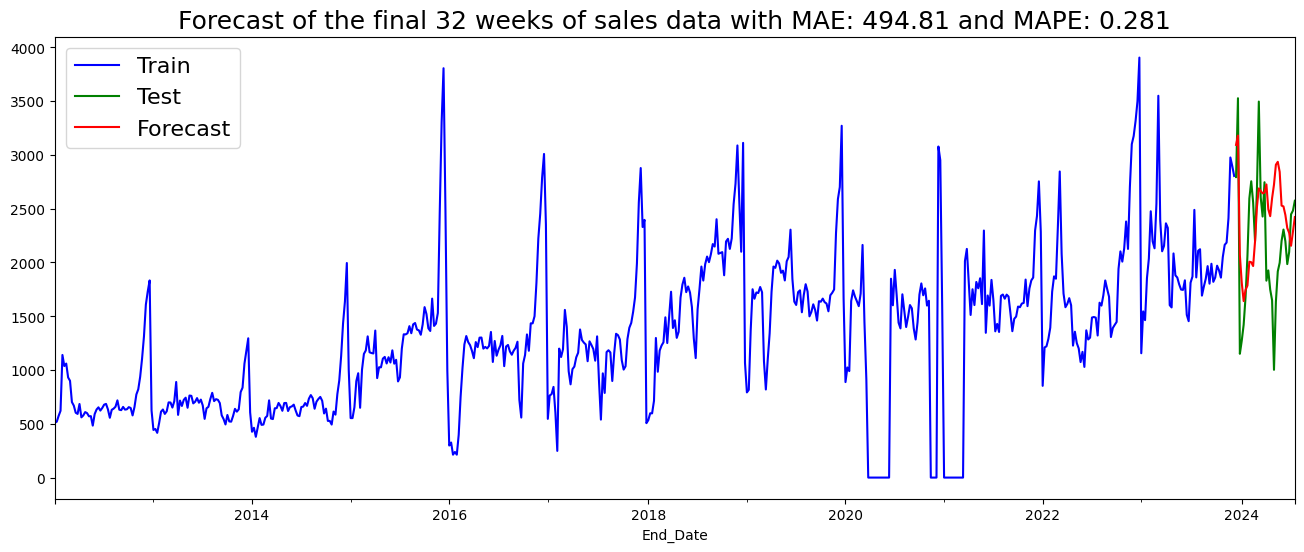

MAE: 494.80524027473035
MAPE: 0.2809567391647475


In [ ]:
# Display the MAE and MAPE
mae, mape = plot_predictions(caterpillar_train, caterpillar_test, predictions_caterpillar)

print("MAE:", mae)
print("MAPE:", mape)

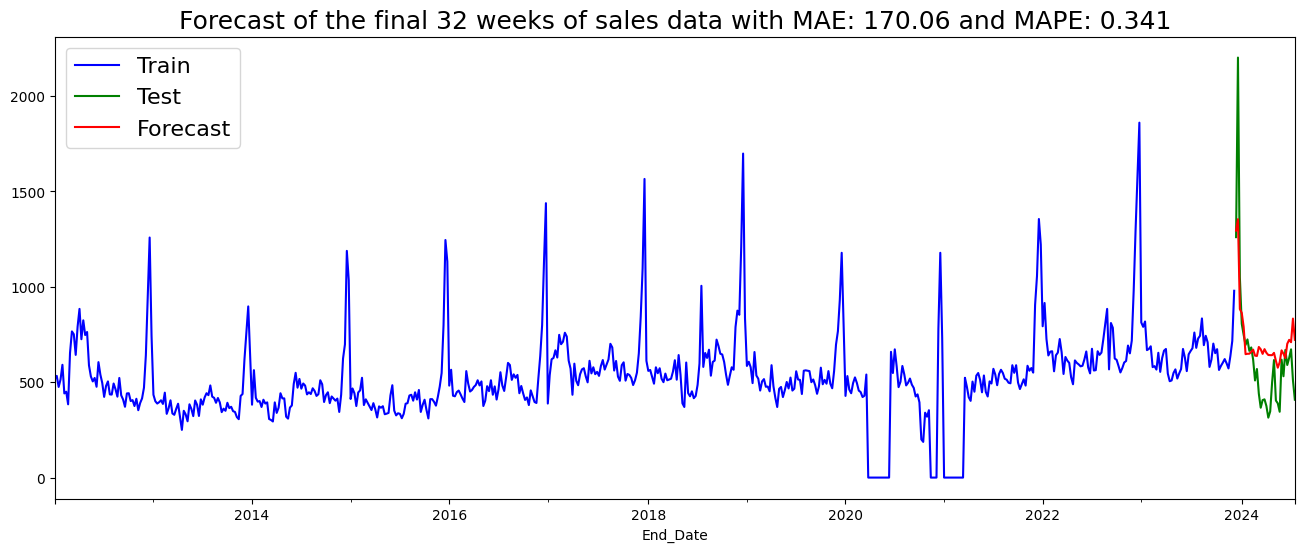

MAE: 170.05962715805856
MAPE: 0.34110337253135703


In [ ]:
# Display the MAE and MAPE for the Alchemist
mae, mape = plot_predictions(alchemist_train, alchemist_test, predictions_alchemist)

print("MAE:", mae)
print("MAPE:", mape)

# References

Olamaie, M. 2025. CAM_DS_C301_9.1 Topic project_Template.ipynb. [Accessed 18 August 2025].

The Nielsen BookScan, 2025. ISBN dataset. [Accessed 18 August 2025].

The Nielsen BookScan, 2025. Weekly UK sales dataset. [Accessed 18 August 2025].

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025: 6.2.6 ACF, PACF, and random walk. Available at: https://fourthrev.instructure.com/courses/897/pages/6-dot-2-6-acf-pacf-and-random-walk?module_item_id=67675. [Accessed 18 August 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025. 6.3.3 Applying statistical tests to time series data. Available at: https://fourthrev.instructure.com/courses/897/pages/6-dot-3-3-applying-statistical-tests-to-time-series-data?module_item_id=67679. [Accessed 18 August 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025. 6.4.5 Decomposing and stationarising a time series example. Available at: https://fourthrev.instructure.com/courses/897/pages/6-dot-4-5-decomposing-and-stationarising-a-time-series-example?module_item_id=67685. [Accessed 18 August 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025. 7.2.3 Handling seasonality. https://fourthrev.instructure.com/courses/897/pages/7-dot-2-3-handling-seasonality?module_item_id=67699. [Accessed 18 August 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025. 7.3.1 Introducing auto ARIMA. https://fourthrev.instructure.com/courses/897/pages/7-dot-3-1-introducing-auto-arima?module_item_id=67701. [Accessed 18 August 2025]. Password protected.

University of Cambridge, Institute for Continuing Education, 2023. CAM_DS_301 Applying advanced data science techniques P1_2025. 8.1.1 Gradient-boosting models. https://fourthrev.instructure.com/courses/897/pages/8-dot-1-1-gradient-boosting-models?module_item_id=67709. [Accessed 18 August 2025]. Password protected.